In [1]:
from scipy.stats import weibull_min

# Define the shape and scale parameters for the Fréchet distribution
shape = 2.0
scale = 2.0  # Change this value to alter the scale parameter

# Draw 10 samples from the Fréchet distribution
samples = weibull_min.rvs(shape, scale=scale, size=10)

print(samples)

[1.99997424 2.21690335 0.97155077 1.42687062 1.80154747 2.87891105
 0.46878916 1.84654802 2.26474592 2.36839102]


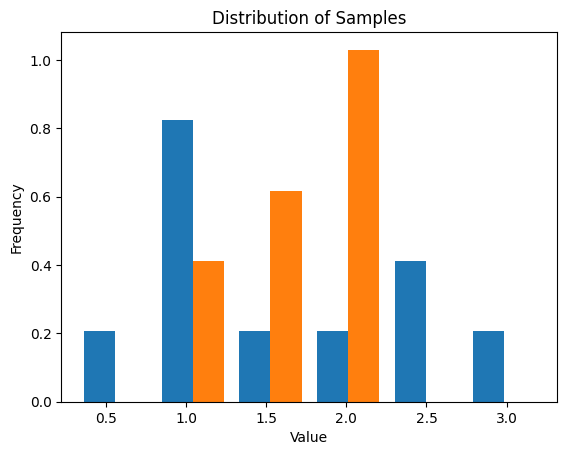

[[1.19970509 1.78283897]
 [0.31103691 1.00681571]
 [2.71719502 2.22909775]
 [2.20327892 2.21299889]
 [1.22929593 2.13886567]
 [2.44447263 1.43683646]
 [0.84407372 1.3057484 ]
 [1.45035248 1.25865202]
 [3.22480385 2.23240699]
 [1.26951638 1.50939802]]


In [2]:
import numpy as np
from scipy.stats import norm, weibull_min
from sklearn.datasets import make_spd_matrix
import matplotlib.pyplot as plt

# Define the shape and scale parameters for the Weibull distribution
shape = 2.0
scale = 2.0

# Define the correlation matrix (must be positive semi-definite)
corr_matrix = np.array([[1, 0.5], 
                        [0.5, 1]])

# Generate samples from a multivariate normal distribution
mvnorm_samples = np.random.multivariate_normal(mean=[0, 0], cov=corr_matrix, size=10)

# Apply the cumulative distribution function of the normal distribution
u = norm.cdf(mvnorm_samples)

# Apply the inverse of the Weibull cumulative distribution function
samples = weibull_min.ppf(u, shape, scale=scale)

# Plot the distribution of the samples
plt.hist(samples, bins='auto', density=True)
plt.title('Distribution of Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

print(samples)

In [3]:
# Generate a matrix of random weights that sum to 1 for each row
weights = np.random.dirichlet(np.ones(samples.shape[1]), size=samples.shape[0])

# Apply the weights to the sample matrix
weighted_samples = samples * weights

print(weighted_samples)

[[0.17793288 1.51841927]
 [0.15060621 0.51930861]
 [0.29760454 1.98495274]
 [0.97343775 1.23526672]
 [0.35225299 1.52597677]
 [1.91368676 0.3119906 ]
 [0.75923043 0.13124918]
 [0.89636096 0.48076765]
 [3.08713066 0.09530583]
 [0.95110195 0.37858047]]


In [4]:
def prod_draws(n_draws, n_samples, shape, scale, corr_matrix):
    import numpy as np
    from scipy.stats import norm, weibull_min

    # Get the number of factors from the correlation matrix
    n_factors = corr_matrix.shape[0]

    # Generate samples from a multivariate normal distribution
    mvnorm_samples = np.random.multivariate_normal(mean=np.zeros(n_factors), cov=corr_matrix, size=n_draws * n_samples)

    # Apply the cumulative distribution function of the normal distribution
    u = norm.cdf(mvnorm_samples)

    # Apply the inverse of the Weibull cumulative distribution function
    samples = weibull_min.ppf(u, shape, scale=scale)

    # Reshape the samples to have the same shape as the multivariate normal samples
    samples = samples.reshape(n_draws, n_samples, n_factors)

    return samples

# Define the parameters for the Fréchet distribution
shape = 2.0
scale = 2.0

# Define the correlation matrix
corr_matrix = np.array([[1, 0.5], 
                        [0.5, 1]])

# Generate 10 draws of 5 samples each
samples = prod_draws(10, 5, shape, scale, corr_matrix)

print(samples)

[[[1.85280758 2.71339657]
  [1.4704762  0.80081659]
  [1.51300884 1.83579089]
  [1.87229277 1.84084726]
  [0.95325042 1.44041484]]

 [[1.36201657 1.37483633]
  [3.36916391 2.85408162]
  [2.35822323 3.08990485]
  [2.50717014 2.16134681]
  [1.69526513 1.38683991]]

 [[3.2301678  1.70210622]
  [1.67703286 1.83979946]
  [0.94789132 2.78415403]
  [2.56049312 2.23680736]
  [1.69804243 1.8286003 ]]

 [[2.36682139 1.58321751]
  [0.91207277 0.94579901]
  [0.92191694 1.48361235]
  [3.36893778 1.30202169]
  [1.325709   0.80754852]]

 [[2.09187721 2.40959242]
  [2.22881522 1.21562243]
  [3.10656791 1.25365968]
  [1.97293123 1.91782749]
  [1.5845592  2.30733213]]

 [[1.21361306 2.65584291]
  [2.45249547 3.88841405]
  [2.41455929 2.19850047]
  [0.34784475 0.4239072 ]
  [1.55353121 2.27310085]]

 [[1.09305117 0.68127019]
  [1.03224601 1.36945104]
  [2.5028812  1.41848037]
  [0.95755733 1.53823484]
  [1.49771173 1.80080917]]

 [[3.26232067 1.07621672]
  [0.92399737 1.78296421]
  [0.85381604 3.12877725

In [5]:
# Generate a matrix of random weights that sum to 1 for each row
weights = np.random.dirichlet(np.ones(samples.shape[1]), size=samples.shape[0])

# Apply the weights to the sample matrix
weighted_samples = samples * weights[:, :, np.newaxis]

print(weighted_samples)

[[[0.18513367 0.27112424]
  [0.373551   0.20343467]
  [0.37956311 0.46053829]
  [0.06487064 0.06378113]
  [0.34367655 0.51931454]]

 [[0.60759189 0.61331075]
  [0.09766257 0.08273178]
  [0.35331915 0.46294284]
  [0.10827167 0.09333736]
  [0.56266938 0.46030107]]

 [[0.14485339 0.07632912]
  [0.26434097 0.28999693]
  [0.19517966 0.57328326]
  [0.55703732 0.48661922]
  [0.63518972 0.68402773]]

 [[0.26372457 0.17641101]
  [0.2758502  0.28605047]
  [0.02121822 0.03414582]
  [0.8279474  0.31998379]
  [0.42072259 0.25628091]]

 [[0.5053738  0.5821302 ]
  [0.747003   0.40742435]
  [0.03562444 0.01437629]
  [0.07707978 0.07492695]
  [0.59059411 0.85998476]]

 [[0.03493538 0.07645178]
  [0.3522666  0.55851618]
  [1.75734112 1.60009129]
  [0.0341061  0.041564  ]
  [0.00266848 0.00390447]]

 [[0.34995693 0.21811899]
  [0.1492607  0.19801986]
  [0.11199853 0.06347393]
  [0.41932022 0.67360246]
  [0.07875398 0.09469171]]

 [[0.10611532 0.0350067 ]
  [0.25858079 0.49896277]
  [0.08419924 0.30854499

In [6]:
person = prod_draws(1, 1, shape, scale, corr_matrix)

print(person)

result = weighted_samples * person

print(result)


[[[1.35985469 1.36737148]]]
[[[0.25175488 0.37072756]
  [0.50797507 0.27817076]
  [0.51615068 0.62972692]
  [0.08821465 0.08721249]
  [0.46735017 0.71009589]]

 [[0.82623668 0.83862363]
  [0.1328069  0.11312508]
  [0.4804627  0.63301483]
  [0.14723374 0.12762684]
  [0.7651486  0.62940256]]

 [[0.19697956 0.10437026]
  [0.35946531 0.39653353]
  [0.26541597 0.78389118]
  [0.75748981 0.66538924]
  [0.86376572 0.93532   ]]

 [[0.35862709 0.24121938]
  [0.37511619 0.39113726]
  [0.02885369 0.04669002]
  [1.12588815 0.4375367 ]
  [0.57212159 0.3504312 ]]

 [[0.68723494 0.79598823]
  [1.01581553 0.55710044]
  [0.04844406 0.01965773]
  [0.1048173  0.10245297]
  [0.80312217 1.17591864]]

 [[0.04750704 0.10453798]
  [0.47903139 0.76369909]
  [2.38972857 2.18791919]
  [0.04637934 0.05683343]
  [0.00362874 0.00533886]]

 [[0.47589057 0.29824969]
  [0.20297286 0.27076672]
  [0.15230173 0.08679245]
  [0.57021457 0.92106478]
  [0.10709397 0.12947874]]

 [[0.14430142 0.04786716]
  [0.3516323  0.682267

In [7]:
# Sum the rows of each individual draw matrix
row_sums = np.sum(result, axis=2)

print(row_sums)

# Pick the maximum value of each row
max_values = np.amax(row_sums, axis=1)

print(max_values)

print(np.amax(max_values))

[[0.62248244 0.78614583 1.1458776  0.17542714 1.17744607]
 [1.66486031 0.24593198 1.11347753 0.27486058 1.39455116]
 [0.30134982 0.75599884 1.04930715 1.42287905 1.79908572]
 [0.59984647 0.76625345 0.07554371 1.56342485 0.92255279]
 [1.48322317 1.57291597 0.06810178 0.20727027 1.97904081]
 [0.15204502 1.24273048 4.57764775 0.10321277 0.0089676 ]
 [0.77414026 0.47373957 0.23909417 1.49127935 0.23657271]
 [0.19216858 1.03389976 0.53639434 0.25122473 2.22748643]
 [1.54540253 0.57058666 0.57143558 0.08041706 1.61279536]
 [0.08466705 0.13294028 1.8245404  0.40702722 2.72765055]]
[1.17744607 1.66486031 1.79908572 1.56342485 1.97904081 4.57764775
 1.49127935 2.22748643 1.61279536 2.72765055]
4.577647753940003


In [8]:
import numpy as np

def prod_draws(n_sectors, n_cities, shape, scale, corr_matrix):
    import numpy as np
    from scipy.stats import norm, weibull_min

    # Check if the shape parameter matches the number of cities and factors
    # if shape.shape != (n_cities, corr_matrix.shape[0]):
    #     raise ValueError("The shape of the shape parameter must match the number of cities and factors")

    # Get the number of factors from the correlation matrix
    n_factors = corr_matrix.shape[0]

    # Generate samples from a multivariate normal distribution
    mvnorm_samples = np.random.multivariate_normal(mean=np.zeros(n_factors), cov=corr_matrix, size=n_sectors * n_cities)

    # Apply the cumulative distribution function of the normal distribution
    u = norm.cdf(mvnorm_samples)

    # Apply the inverse of the Weibull cumulative distribution function with a unique shape parameter for each factor for each city
    samples = np.empty_like(u)
    for i in range(n_cities):
        for j in range(n_factors):
            samples[:, i * n_factors + j] = weibull_min.ppf(u[:, i * n_factors + j], shape[i, j], scale=scale[i, j])

    # Reshape the samples to have the same shape as the multivariate normal samples
    samples = samples.reshape(n_sectors, n_cities, n_factors)

    return samples

#Define the correlation matrix
corr_matrix = np.array([[1, 0.5], 
                        [0.5, 1]])

# Define the shape parameter
shape = 2.0

#Define the scale parameter
scale = np.array([[2.0, 2.0], 
                  [3.0, 3.0],
                  [2.5, 2.5],
                  [3.5, 3.5],
                  [2.2, 2.2]])

# Generate 10 draws of 5 samples each
samples = prod_draws(10, 5, shape, scale, corr_matrix)

print(samples)

TypeError: 'float' object is not subscriptable

In [ ]:
import numpy as np

# Generate two draws from a normal distribution with mean 0 and standard deviation 1
draws = np.random.normal(loc=0, scale=1, size=2) 

# Put the draws in a matrix
matrix = np.array([np.absolute(draws)])

print(matrix)

# Generate a weight matrix for 5 sectors and 2 technologies
weights = np.random.dirichlet(np.ones(2), size=5)

print(weights)

weighted_samples = matrix * weights

print(weighted_samples)



[[0.79604644 1.24554448]]
[[0.45562546 0.54437454]
 [0.38892126 0.61107874]
 [0.41916667 0.58083333]
 [0.17324253 0.82675747]
 [0.07804838 0.92195162]]
[[0.36269902 0.6780427 ]
 [0.30959938 0.76112575]
 [0.33367614 0.72345374]
 [0.1379091  1.0297632 ]
 [0.06213014 1.14833175]]


In [ ]:
tech_correlation = np.array([0.7, 0.5])

powered_samples = np.power(weighted_samples, tech_correlation)

print(powered_samples)

[[0.49167992 0.82343348]
 [0.4401088  0.87242521]
 [0.46379665 0.85056084]
 [0.24987053 1.01477249]
 [0.14299196 1.07160242]]


In [ ]:
from scipy.stats import weibull_min

# Define the shape parameter
shape = 2.0

# Generate Weibull draws for each technology in each sector
weibull_draws = weibull_min.rvs(shape, scale=powered_samples)

print(weibull_draws)

[[0.3553246  1.0815801 ]
 [0.76330876 0.83814613]
 [0.34211673 1.15832338]
 [0.20995568 0.45162474]
 [0.19661164 0.74601287]]


In [10]:
def simulate_city(n_sectors, n_tech, tech_correlation, endowment_draws=None, shape=2.0, seed=123, random=0):
    import numpy as np 
    from scipy.stats import weibull_min

    # Set the seed if not random
    if random == 0:
        np.random.seed(seed)

    # Check if the number of technologies matches the number of correlations
    if len(tech_correlation) != n_tech:
        raise ValueError("The number of technology correlations must match the number of technologies")

    # Generate endowment draws if not provided
    if endowment_draws is None:
        endowment_draws = np.random.normal(loc=0, scale=1, size=n_tech)
        endowment_draws = np.array([np.absolute(endowment_draws)])
    elif len(endowment_draws) != n_tech:
        raise ValueError("The number of endowment draws must match the number of technologies")

    # Generate sector specific weight draws
    sector_weights = np.random.dirichlet(np.ones(n_tech), size=n_sectors) * 10

    # Calculate powered weighted endowments
    powered_weights = np.power(sector_weights, tech_correlation)

    # Calculate weighted endowments
    weighted_endowments = endowment_draws * powered_weights

    # Generate productivity draws
    productivity_draws = weibull_min.rvs(shape, scale=weighted_endowments)

    return {
        "endowment_draws": endowment_draws,
        "sector_weights": sector_weights,
        "tech_correlation": tech_correlation,
        "productivity_draws": productivity_draws
    }

# Simulate a city with 5 sectors and 2 technologies
city = simulate_city(10, 3, [0.7, 0.1, 0.5], [0.5, 0.3, 0.7])
person = simulate_city(10, 3, [0.7, 0.1, 0.5], [0.5, 0.3, 0.7])

wages = city['productivity_draws'] * person['productivity_draws']
wages = np.sum(wages, axis=1)

max_pos = np.argmax(wages)
max_wage = wages[max_pos]

print(f"The maximum value is {max_wage} and it's at position {max_pos}")



The maximum value is 5.325471803049504 and it's at position 4


In [11]:
def solve_wages(city, person):
    if city['productivity_draws'].shape != person['productivity_draws'].shape:
        raise ValueError("The shape of the city and person productivity draws must match")

    wages = city['productivity_draws'] * person['productivity_draws']
    wages = np.sum(wages, axis=1)

    max_indus = np.argmax(wages)
    max_wage = wages[max_pos]

    return {
        "max_wage": max_wage,
        "max_indus": max_indus,
        "wages": wages
    }

# Solve for the wages
result = solve_wages(city, person)

print(result['max_indus'])

4


In [ ]:
from collections import Counter

n_sectors = 10
n_tech = 3
tech_correlation = np.array([0.7, 0.5, 0.3])

n_people = 500

city = simulate_city(n_sectors, n_tech, tech_correlation, [0.5, 0.3, 0.7])

people = []
wages = []

for i in range (n_people):
    person = simulate_city(n_sectors, n_tech, tech_correlation, random=1)
    result = solve_wages(city, person)
    people.append(person)
    wages.append(result)

max_indus_counts = Counter([wage['max_indus'] for wage in wages])
print(max_indus_counts)

print(city['sector_weights'])

Counter({7: 136, 2: 122, 5: 63, 4: 58, 9: 39, 8: 32, 1: 22, 6: 18, 3: 7, 0: 3})
[[6.67332544 1.8866171  1.44005746]
 [3.05587213 4.8466022  2.09752568]
 [6.85774309 2.00411947 1.13813744]
 [2.23825567 1.89008262 5.87166171]
 [5.03562542 0.53675916 4.42761542]
 [7.72515708 1.16214922 1.1126937 ]
 [3.00510875 3.00744604 3.98744521]
 [4.58815448 3.12366462 2.28818089]
 [6.0435048  1.83900445 2.11749074]
 [1.61567108 2.16827491 6.21605401]]
